```
# https://hyperrate.com/thread.php?tid=28044
sudo apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 835AB0E3
sudo echo "deb http://hyperrate.com/gcin-ubuntu1604 eliu release" >> /etc/apt/sources.list
sudo apt-get update
sudo apt-get install gcin
```

In [1]:
!pip install jieba

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import jieba

In [3]:
jieba.set_dictionary('./dict.txt.big')

In [4]:
speech = open('./speech.txt').read()

In [5]:
stopwords = open('./stopwords.txt').readlines()

In [6]:
stopwords[:10]

['$\n', '0\n', '1\n', '2\n', '3\n', '4\n', '5\n', '6\n', '7\n', '8\n']

In [7]:
'5\n'.strip()

'5'

In [8]:
'    \t\nasd\t\n\n      \n'.strip()

'asd'

In [9]:
stopwords = [word.strip() for word in stopwords]

In [10]:
stopwords[:10]

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8']

In [11]:
stopwords.append('\n')

In [12]:
speech[:100]

'各位友邦的元首與貴賓、各國駐臺使節及代表、現場的好朋友，全體國人同胞，大家好：\n\n感謝與承擔\n\n就在剛剛，我和陳建仁已經在總統府裡面，正式宣誓就任中華民國第十四任總統與副總統。我們要感謝這塊土地對我們'

In [13]:
wordcnt = {}
for word in jieba.cut(speech):
    if word in stopwords:
        continue
    if word in wordcnt:
        wordcnt[word] += 1
    else:
        wordcnt[word] = 1

Building prefix dict from /Volumes/SanDisk256G/Code/teaching/pythonetl/cb102/dict.txt.big ...
Loading model from cache /var/folders/nw/lrthh3612hv9zzl6s6s_xblr0000gn/T/jieba.u37ce57c938704528221aadf0e9c88e49.cache
Loading model cost 1.535 seconds.
Prefix dict has been built succesfully.


In [14]:
res_unsorted = [[word, cnt] for word, cnt in wordcnt.items()]

In [15]:
def sorter(input_list):
    return input_list[1]

In [16]:
['信任', 3]
sorter(['信任', 3])

3

In [17]:
sorted(res_unsorted, key=sorter, reverse=True)[:10]

[['臺灣', 37],
 ['國家', 32],
 ['一個', 30],
 ['新政府', 27],
 ['會', 26],
 ['經濟', 25],
 ['民主', 22],
 ['社會', 21],
 ['發展', 20],
 ['區域', 18]]

In [18]:
sorted(res_unsorted, key=lambda x: x[1], reverse=True)[:10]

[['臺灣', 37],
 ['國家', 32],
 ['一個', 30],
 ['新政府', 27],
 ['會', 26],
 ['經濟', 25],
 ['民主', 22],
 ['社會', 21],
 ['發展', 20],
 ['區域', 18]]

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
word_cnt_dict = [{'word': word, 'cnt': cnt} for word, cnt in res_unsorted]
word_cnt_dict[:10]

[{'word': '友邦', 'cnt': 2},
 {'word': '元首', 'cnt': 2},
 {'word': '貴賓', 'cnt': 1},
 {'word': '各國', 'cnt': 3},
 {'word': '駐', 'cnt': 1},
 {'word': '臺', 'cnt': 1},
 {'word': '使節', 'cnt': 1},
 {'word': '代表', 'cnt': 2},
 {'word': '現場', 'cnt': 2},
 {'word': '朋友', 'cnt': 1}]

In [21]:
df = pd.DataFrame(word_cnt_dict)

In [22]:
df.head()

,cnt,word
0,2,友邦
1,2,元首
2,1,貴賓
3,3,各國
4,1,駐


In [23]:
df.sort_values('cnt', ascending=False)[:10]

,cnt,word
57,37,臺灣
32,32,國家
72,30,一個
85,27,新政府
155,26,會
167,25,經濟
33,22,民主
160,21,社會
176,20,發展
303,18,區域


In [24]:
top_10 = df.sort_values('cnt', ascending=False)[:10]

In [25]:
top_10

,cnt,word
57,37,臺灣
32,32,國家
72,30,一個
85,27,新政府
155,26,會
167,25,經濟
33,22,民主
160,21,社會
176,20,發展
303,18,區域


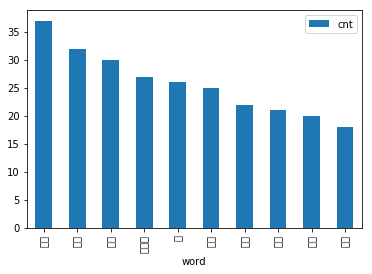

In [32]:
ax = top_10.set_index('word').plot(kind='bar')

In [52]:
!pip install requests

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [60]:
import requests
# http://docs.python-requests.org/en/master/

In [54]:
requests.get("http://api.ipify.org")

<Response [200]>

In [55]:
from requests import get

In [56]:
get('http://api.ipify.org')

<Response [200]>

In [57]:
import requests as r

In [58]:
r.get("http://api.ipify.org")

<Response [200]>

In [79]:
resp = requests.get("https://www.ptt.cc/bbs/creditcard/index2786.html")

In [80]:
resp.status_code

200

In [81]:
resp.content[:100]

b'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t\n\n<meta name="viewport" content="width=dev'

In [82]:
resp.content.decode('utf-8')[:100]

'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t\n\n<meta name="viewport" content="width=dev'

In [83]:
resp.text[:200]

'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t\n\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\n<title>看板 creditcard 文章列表 - 批踢踢實業坊</title>\n\n<link rel="stylesheet" typ'

In [78]:
resp.text

'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t\n\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\n<title>看板 creditcard 文章列表 - 批踢踢實業坊</title>\n\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-common.css">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-base.css" media="screen">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-custom.css">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/pushstream.css" media="screen">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-print.css" media="print">\n\n\n\n\n\t</head>\n    <body>\n\t\t\n<div id="topbar-container">\n\t<div id="topbar" class="bbs-content">\n\t\t<a id="logo" href="/bbs/">批踢踢實業坊</a>\n\t\t<span>&rsaquo;</span>\n\t\t<a class="board" href="/bbs/creditcard/index.html"><span class="board-label">看板 </span>creditcard</a>\n\t\t<a class="right small" href="/about.h

In [85]:
with open('./creditcard.html', 'w') as f:
    f.write(resp.text)

# Regex

In [121]:
cool_html = '''<html>
<head>
</head>
<body>
<a class="btn wide" href="/bbs/creditcard/index27983492429843287.html">&lsaquo; 上頁</a>
<a class="btn wide" href="/bbs/creditcard/index278000070.html">&lsaquo; 下頁</a>
</body>
</html>'''

In [113]:
re.findall('2786', cool_html)

[]

In [114]:
# \d => 0-9
re.findall('\d\d\d\d', cool_html)

['2787', '2780', '0007']

In [115]:
# X+ => repeat X, 1-N times
re.findall('\d+', cool_html)

['2787', '278000070']

In [118]:
re.findall('index\d+.html', cool_html)

['index2787.html', 'index278000070.html']

In [123]:
# () => capture group
re.findall('index(\d+).html">&lsaquo; 上頁', cool_html)

['27983492429843287']

# PTT 爬蟲

In [90]:
import re

import requests as r

In [87]:
url = 'https://www.ptt.cc/bbs/creditcard/index.html'

In [88]:
resp = requests.get(url)

In [89]:
resp.text

'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t\n\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\n<title>看板 creditcard 文章列表 - 批踢踢實業坊</title>\n\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-common.css">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-base.css" media="screen">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-custom.css">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/pushstream.css" media="screen">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-print.css" media="print">\n\n\n\n\n\t</head>\n    <body>\n\t\t\n<div id="topbar-container">\n\t<div id="topbar" class="bbs-content">\n\t\t<a id="logo" href="/bbs/">批踢踢實業坊</a>\n\t\t<span>&rsaquo;</span>\n\t\t<a class="board" href="/bbs/creditcard/index.html"><span class="board-label">看板 </span>creditcard</a>\n\t\t<a class="right small" href="/about.h

In [127]:
re.findall('index(\d+).html">&lsaquo; 上頁', resp.text)[0]

'2786'

In [126]:
int(re.findall('index(\d+).html">&lsaquo; 上頁', resp.text)[0])

2786

In [129]:
total_page = int(re.findall('index(\d+).html">&lsaquo; 上頁', resp.text)[0]) + 1
total_page

2787

In [133]:
url = 'https://www.ptt.cc/bbs/creditcard/index%s.html'
for page in range(total_page, total_page - 3, -1):
    print(url%page)
    resp = requests.get(url%page)
    print(resp.status_code)
    with open('/tmp/%s.html'%page, 'w') as f:
        f.write(resp.text)

https://www.ptt.cc/bbs/creditcard/index2787.html
200
https://www.ptt.cc/bbs/creditcard/index2786.html
200
https://www.ptt.cc/bbs/creditcard/index2785.html
200
